In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

In [62]:
df = pd.read_csv('/content/ObesityDataSet.csv')
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [63]:
df.duplicated().sum()

24

In [64]:
df.drop_duplicates(inplace=True)

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2087 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2087 non-null   object 
 1   Age                             2087 non-null   float64
 2   Height                          2087 non-null   float64
 3   Weight                          2087 non-null   float64
 4   family_history_with_overweight  2087 non-null   object 
 5   FAVC                            2087 non-null   object 
 6   FCVC                            2087 non-null   float64
 7   NCP                             2087 non-null   float64
 8   CAEC                            2087 non-null   object 
 9   SMOKE                           2087 non-null   object 
 10  CH2O                            2087 non-null   float64
 11  SCC                             2087 non-null   object 
 12  FAF                             2087 no

In [66]:
df.isnull().sum()

,0
Gender,0
Age,0
Height,0
Weight,0
family_history_with_overweight,0
FAVC,0
FCVC,0
NCP,0
CAEC,0
SMOKE,0


In [67]:
num_columns = df.select_dtypes(include = ['int', 'float'])
cat_columns = df.select_dtypes(exclude = ['int', 'float']).drop(columns = 'NObeyesdad')

In [68]:
num_columns.head()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
0,21.0,1.62,64.0,2.0,3.0,2.0,0.0,1.0
1,21.0,1.52,56.0,3.0,3.0,3.0,3.0,0.0
2,23.0,1.80,77.0,2.0,3.0,2.0,2.0,1.0
3,27.0,1.80,87.0,3.0,3.0,2.0,2.0,0.0
4,22.0,1.78,89.8,2.0,1.0,2.0,0.0,0.0


In [69]:
num_columns.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,2087.0,24.353090,6.368801,14.00,19.915937,22.847618,26.000000,61.00
Height,2087.0,1.702674,0.093186,1.45,1.630178,1.701584,1.769491,1.98
Weight,2087.0,86.858730,26.190847,39.00,66.000000,83.101100,108.015907,173.00
FCVC,2087.0,2.421466,0.534737,1.00,2.000000,2.396265,3.000000,3.00
NCP,2087.0,2.701179,0.764614,1.00,2.697467,3.000000,3.000000,4.00
CH2O,2087.0,2.004749,0.608284,1.00,1.590922,2.000000,2.466193,3.00
FAF,2087.0,1.012812,0.853475,0.00,0.124505,1.000000,1.678102,3.00
TUE,2087.0,0.663035,0.608153,0.00,0.000000,0.630866,1.000000,2.00


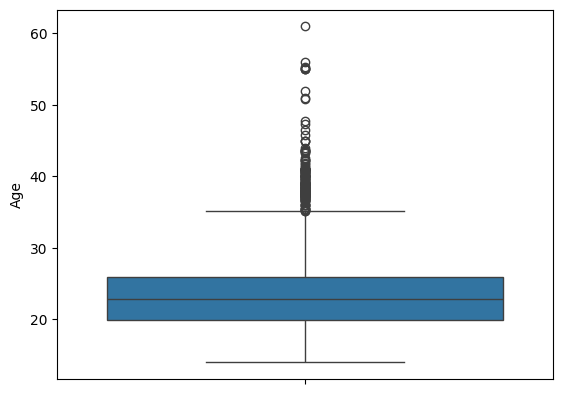

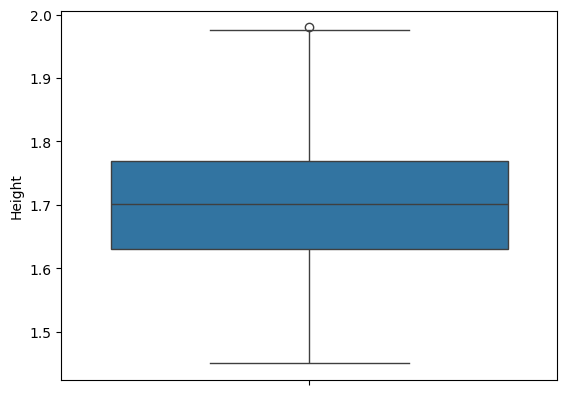

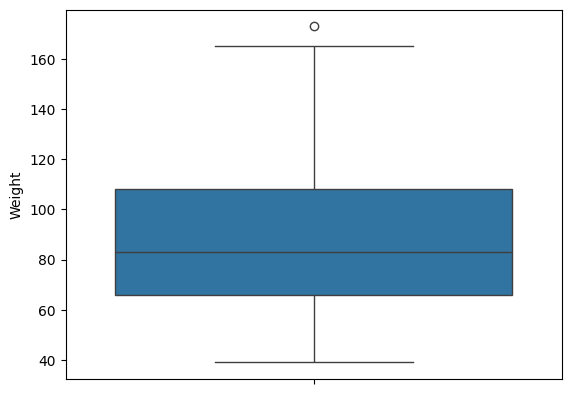

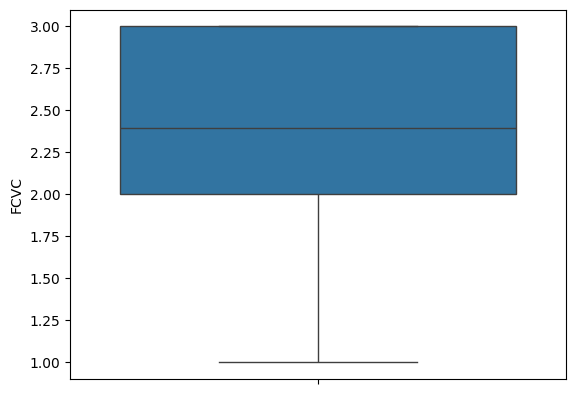

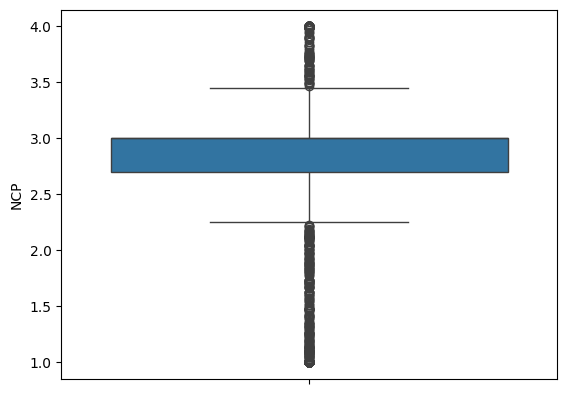

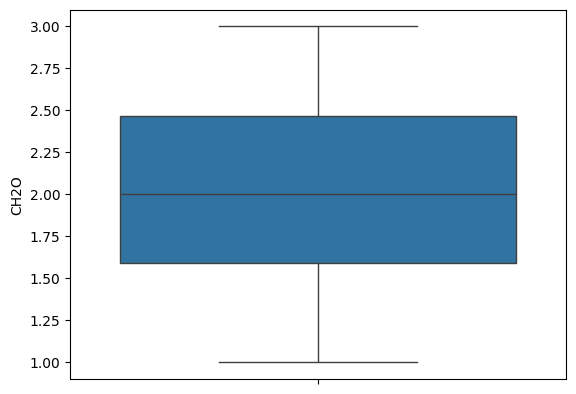

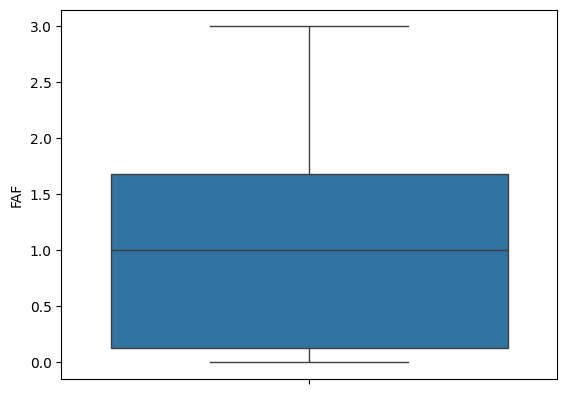

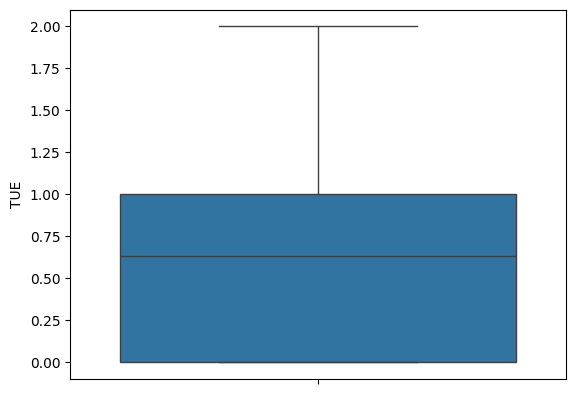

In [70]:
for col in num_columns.columns:
  sns.boxplot(df[col])
  plt.show()

In [71]:
cat_columns.head()

,Gender,family_history_with_overweight,FAVC,CAEC,SMOKE,SCC,CALC,MTRANS
0,Female,yes,no,Sometimes,no,no,no,Public_Transportation
1,Female,yes,no,Sometimes,yes,yes,Sometimes,Public_Transportation
2,Male,yes,no,Sometimes,no,no,Frequently,Public_Transportation
3,Male,no,no,Sometimes,no,no,Frequently,Walking
4,Male,no,no,Sometimes,no,no,Sometimes,Public_Transportation


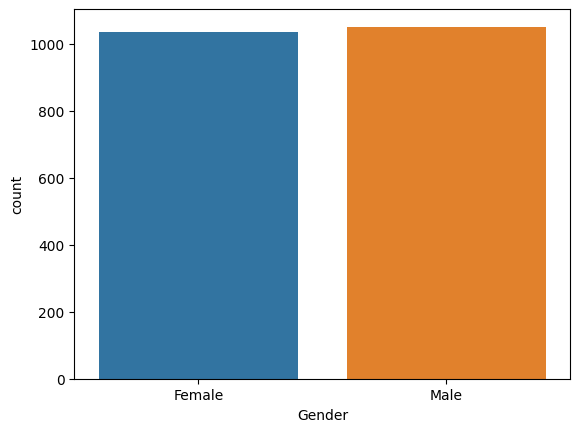

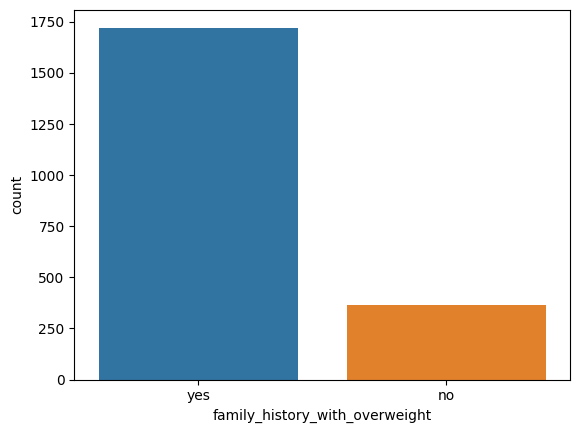

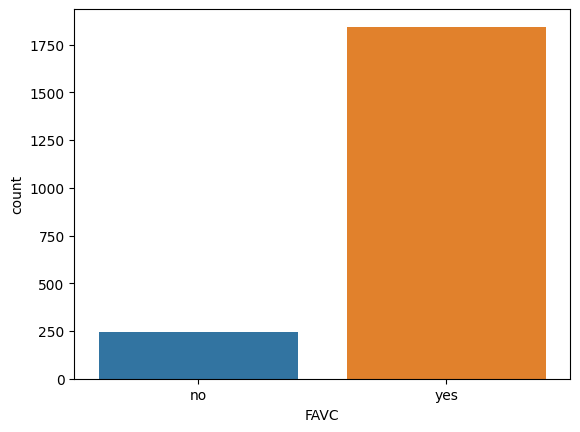

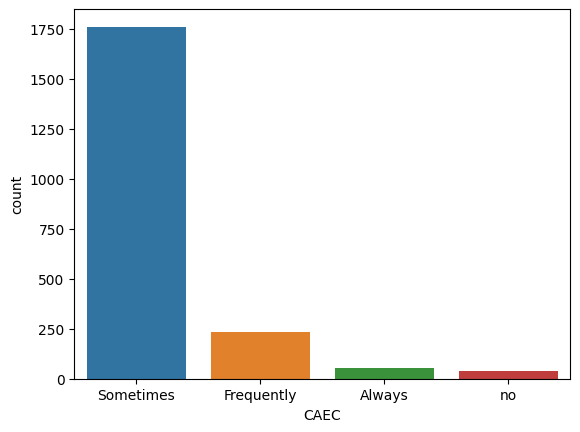

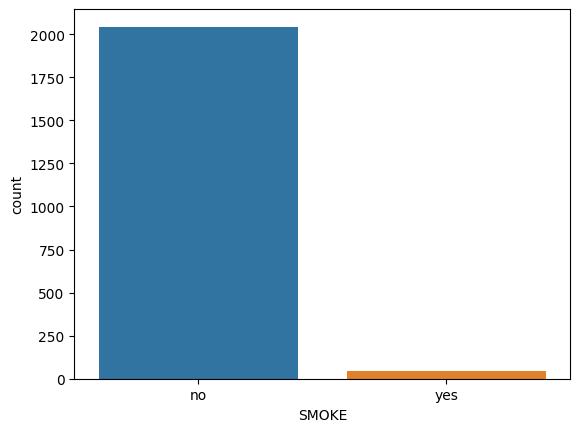

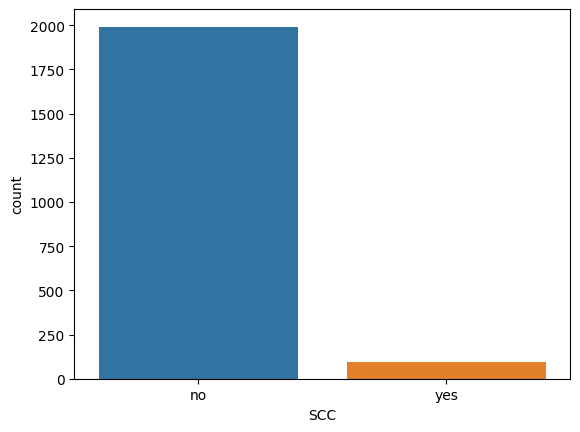

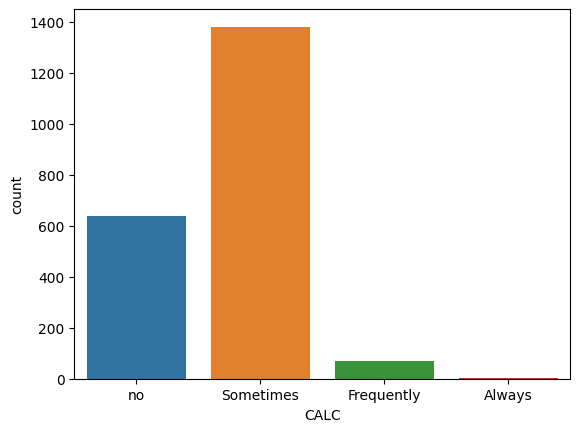

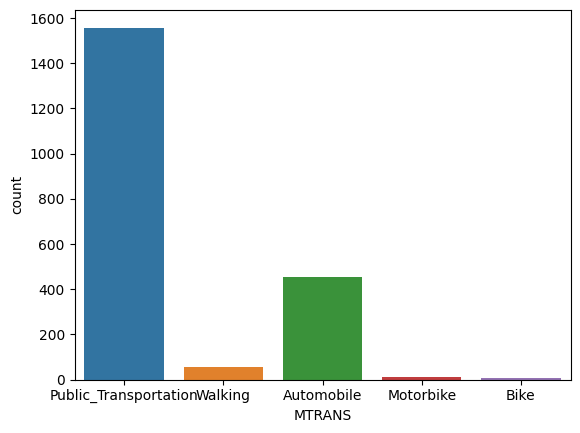

In [72]:
for col in cat_columns.columns:
  sns.countplot(x = col, data = df, hue = col)
  plt.show()

In [73]:
for col in cat_columns.columns:
  print(df[col].value_counts())
  print('\n')

Gender
Male      1052
Female    1035
Name: count, dtype: int64


family_history_with_overweight
yes    1722
no      365
Name: count, dtype: int64


FAVC
yes    1844
no      243
Name: count, dtype: int64


CAEC
Sometimes     1761
Frequently     236
Always          53
no              37
Name: count, dtype: int64


SMOKE
no     2043
yes      44
Name: count, dtype: int64


SCC
no     1991
yes      96
Name: count, dtype: int64


CALC
Sometimes     1380
no             636
Frequently      70
Always           1
Name: count, dtype: int64


MTRANS
Public_Transportation    1558
Automobile                456
Walking                    55
Motorbike                  11
Bike                        7
Name: count, dtype: int64




In [74]:
df['NObeyesdad'].value_counts()

,count
NObeyesdad,
Obesity_Type_I,351
Obesity_Type_III,324
Obesity_Type_II,297
Overweight_Level_II,290
Normal_Weight,282
Overweight_Level_I,276
Insufficient_Weight,267


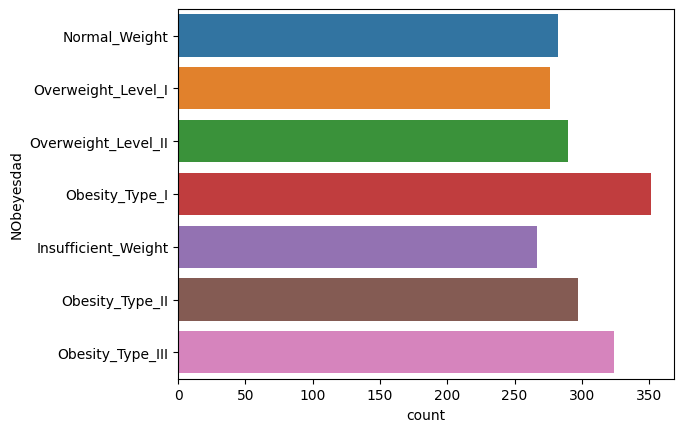

In [75]:
sns.countplot(y = 'NObeyesdad', data = df, hue = 'NObeyesdad')
plt.show()

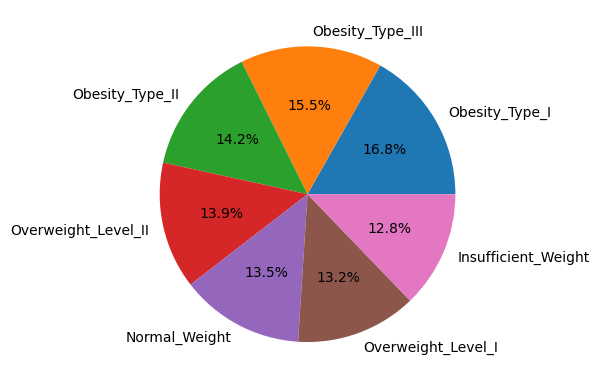

In [76]:
obese_counts = df['NObeyesdad'].value_counts(normalize = True)

plt.pie(obese_counts, labels = obese_counts.index, autopct = '%1.1f%%')
plt.show()

In [77]:
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


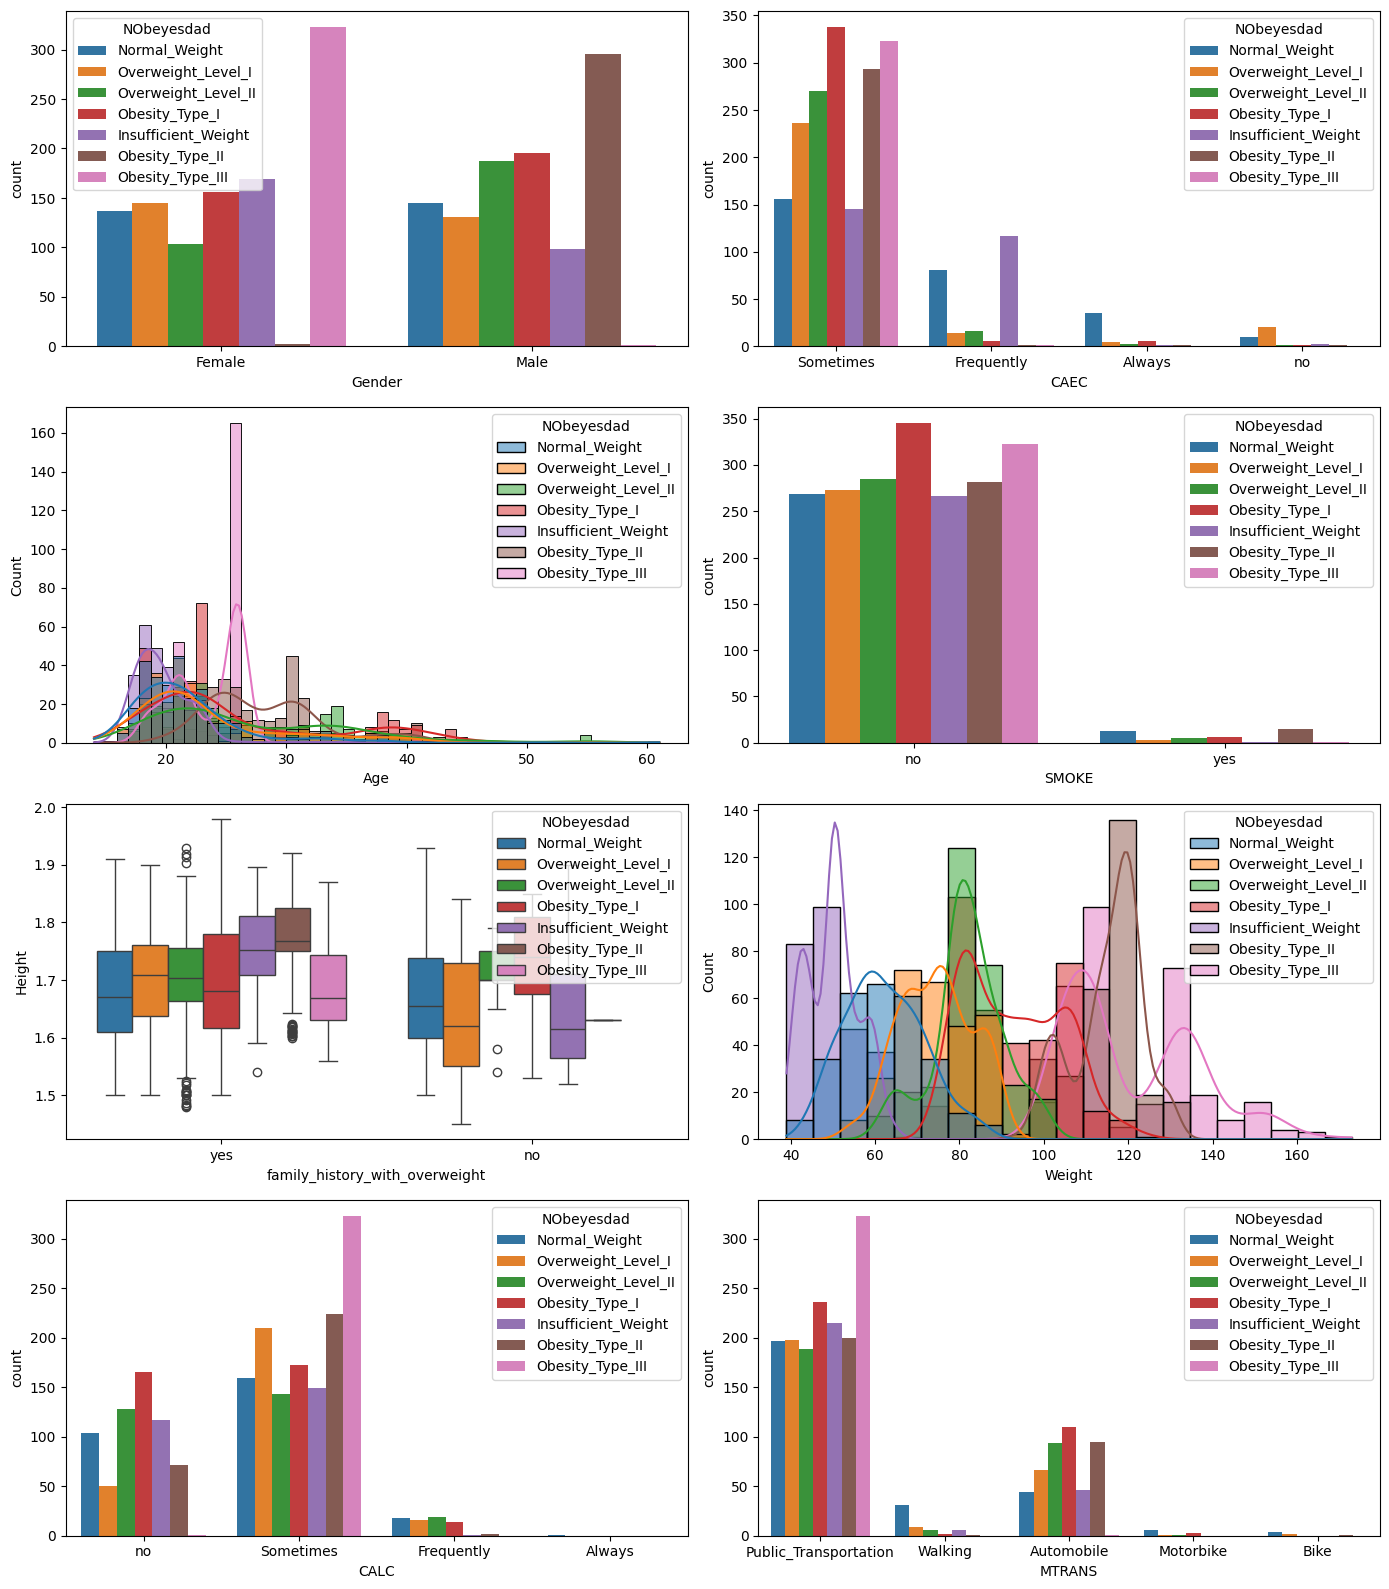

In [78]:
fig, axes = plt.subplots(4, 2, figsize=(14, 16))

sns.countplot(x = 'Gender', data = df, ax = axes[0, 0], hue = 'NObeyesdad')
sns.countplot(x = 'CAEC', data = df, ax = axes[0, 1], hue = 'NObeyesdad')
sns.histplot(x = 'Age', data = df, ax = axes[1, 0], kde = True, hue = 'NObeyesdad')
sns.countplot(x = 'SMOKE', data = df, ax = axes[1, 1], hue = 'NObeyesdad')
sns.boxplot(x = 'family_history_with_overweight', y = 'Height', data = df, ax = axes[2, 0], hue = 'NObeyesdad')
sns.histplot(x = df['Weight'], ax = axes[2, 1], kde = True, hue = df['NObeyesdad'])
sns.countplot(x = 'CALC', data = df, ax = axes[3, 0], hue = 'NObeyesdad')
sns.countplot(x = 'MTRANS', data = df, ax = axes[3, 1], hue = 'NObeyesdad')

plt.tight_layout()
plt.show()

In [79]:
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [80]:
cat_cols = cat_columns.columns.tolist()

In [81]:
df = pd.get_dummies(df, columns = cat_cols, dtype = int)
df.head()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,NObeyesdad,Gender_Female,Gender_Male,family_history_with_overweight_no,family_history_with_overweight_yes,FAVC_no,FAVC_yes,CAEC_Always,CAEC_Frequently,CAEC_Sometimes,CAEC_no,SMOKE_no,SMOKE_yes,SCC_no,SCC_yes,CALC_Always,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,21.0,1.62,64.0,2.0,3.0,2.0,0.0,1.0,Normal_Weight,1,0,0,1,1,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,1,0
1,21.0,1.52,56.0,3.0,3.0,3.0,3.0,0.0,Normal_Weight,1,0,0,1,1,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,0
2,23.0,1.80,77.0,2.0,3.0,2.0,2.0,1.0,Normal_Weight,0,1,0,1,1,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,1,0
3,27.0,1.80,87.0,3.0,3.0,2.0,2.0,0.0,Overweight_Level_I,0,1,1,0,1,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,1
4,22.0,1.78,89.8,2.0,1.0,2.0,0.0,0.0,Overweight_Level_II,0,1,1,0,1,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,1,0


In [82]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df['NObeyesdad'] = encoder.fit_transform(df['NObeyesdad'])
df.head()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,NObeyesdad,Gender_Female,Gender_Male,family_history_with_overweight_no,family_history_with_overweight_yes,FAVC_no,FAVC_yes,CAEC_Always,CAEC_Frequently,CAEC_Sometimes,CAEC_no,SMOKE_no,SMOKE_yes,SCC_no,SCC_yes,CALC_Always,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,21.0,1.62,64.0,2.0,3.0,2.0,0.0,1.0,1,1,0,0,1,1,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,1,0
1,21.0,1.52,56.0,3.0,3.0,3.0,3.0,0.0,1,1,0,0,1,1,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,0
2,23.0,1.80,77.0,2.0,3.0,2.0,2.0,1.0,1,0,1,0,1,1,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,1,0
3,27.0,1.80,87.0,3.0,3.0,2.0,2.0,0.0,5,0,1,1,0,1,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,1
4,22.0,1.78,89.8,2.0,1.0,2.0,0.0,0.0,6,0,1,1,0,1,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,1,0


In [83]:
X.columns

Index(['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE',
       'Gender_Female', 'Gender_Male', 'family_history_with_overweight_no',
       'family_history_with_overweight_yes', 'FAVC_no', 'FAVC_yes',
       'CAEC_Always', 'CAEC_Frequently', 'CAEC_Sometimes', 'CAEC_no',
       'SMOKE_no', 'SMOKE_yes', 'SCC_no', 'SCC_yes', 'CALC_Always',
       'CALC_Frequently', 'CALC_Sometimes', 'CALC_no', 'MTRANS_Automobile',
       'MTRANS_Bike', 'MTRANS_Motorbike', 'MTRANS_Public_Transportation',
       'MTRANS_Walking'],
      dtype='object')

In [84]:
X = df.drop(columns = ['NObeyesdad'], axis = 1)
y = df['NObeyesdad']

In [85]:
from sklearn.feature_selection import mutual_info_classif

mutual_info = mutual_info_classif(X, y)
mutual_info = pd.Series(mutual_info)
mutual_info.index = X.columns
mutual_info.sort_values(ascending = False)

,0
Weight,1.252433
Age,0.586593
Height,0.410677
FCVC,0.390865
CH2O,0.296133
FAF,0.279621
TUE,0.258309
NCP,0.252428
Gender_Male,0.211168
Gender_Female,0.198451


In [86]:
selected_features = mutual_info[mutual_info > 0].index.tolist()
X_selected = X[selected_features]

In [87]:
X_selected.columns

Index(['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE',
       'Gender_Female', 'Gender_Male', 'family_history_with_overweight_no',
       'family_history_with_overweight_yes', 'FAVC_no', 'FAVC_yes',
       'CAEC_Always', 'CAEC_Frequently', 'CAEC_Sometimes', 'CAEC_no',
       'SMOKE_no', 'SCC_no', 'SCC_yes', 'CALC_Sometimes', 'CALC_no',
       'MTRANS_Automobile', 'MTRANS_Bike', 'MTRANS_Motorbike',
       'MTRANS_Public_Transportation', 'MTRANS_Walking'],
      dtype='object')

In [88]:
X_selected.head()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Gender_Female,Gender_Male,family_history_with_overweight_no,family_history_with_overweight_yes,FAVC_no,FAVC_yes,CAEC_Always,CAEC_Frequently,CAEC_Sometimes,CAEC_no,SMOKE_no,SCC_no,SCC_yes,CALC_Sometimes,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,21.0,1.62,64.0,2.0,3.0,2.0,0.0,1.0,1,0,0,1,1,0,0,0,1,0,1,1,0,0,1,0,0,0,1,0
1,21.0,1.52,56.0,3.0,3.0,3.0,3.0,0.0,1,0,0,1,1,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0
2,23.0,1.80,77.0,2.0,3.0,2.0,2.0,1.0,0,1,0,1,1,0,0,0,1,0,1,1,0,0,0,0,0,0,1,0
3,27.0,1.80,87.0,3.0,3.0,2.0,2.0,0.0,0,1,1,0,1,0,0,0,1,0,1,1,0,0,0,0,0,0,0,1
4,22.0,1.78,89.8,2.0,1.0,2.0,0.0,0.0,0,1,1,0,1,0,0,0,1,0,1,1,0,1,0,0,0,0,1,0


In [89]:
num_columns = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

In [90]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size = 0.2, random_state = 42, stratify = y)

In [91]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train[num_columns] = scaler.fit_transform(X_train[num_columns])
X_test[num_columns] = scaler.transform(X_test[num_columns])

In [92]:
X_train.head()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Gender_Female,Gender_Male,family_history_with_overweight_no,family_history_with_overweight_yes,FAVC_no,FAVC_yes,CAEC_Always,CAEC_Frequently,CAEC_Sometimes,CAEC_no,SMOKE_no,SCC_no,SCC_yes,CALC_Sometimes,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
1573,0.248290,0.705537,1.045026,-0.375885,0.391801,0.253102,0.308538,-0.452916,0,1,0,1,0,1,0,0,1,0,1,1,0,1,0,0,0,0,1,0
1598,1.008501,-0.608067,0.505277,1.016483,-0.755149,-1.644954,0.823971,-0.073903,0,1,0,1,0,1,0,0,1,0,1,1,0,0,1,0,0,0,1,0
1179,3.702329,0.457500,-0.078269,0.207948,0.391801,-1.403908,-0.827757,-1.095082,0,1,0,1,0,1,0,0,1,0,1,1,0,0,1,1,0,0,0,0
621,-0.208354,0.416482,-1.265285,-0.345947,0.391801,-0.252848,1.731352,0.245475,1,0,0,1,0,1,0,1,0,0,1,1,0,0,1,0,0,0,1,0
930,-0.523216,-1.012212,-0.725998,-0.801583,0.596256,1.643643,0.204484,-0.952112,1,0,0,1,0,1,0,0,0,1,1,1,0,1,0,0,0,0,1,0


In [93]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

lg_model = LogisticRegression()
dt_model = DecisionTreeClassifier()
rf_model = RandomForestClassifier(random_state = 42)
ab_model = AdaBoostClassifier(random_state = 42)
gb_model = GradientBoostingClassifier(random_state = 42)

def build_evaluate_models(x_train, x_test, y_train, y_test):
  models = [lg_model, dt_model, rf_model, ab_model, gb_model]
  model_names = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'AdaBoost', 'Gradient Boosting']
  for model, name in zip(models, model_names):
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average = 'macro')
    recall = recall_score(y_test, y_pred, average = 'macro')
    f1 = f1_score(y_test, y_pred, average = 'macro')
    confusion = confusion_matrix(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred)
    print(f"{name} Metrics:")
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1}")
    print("Confusion Matrix:")
    print(confusion)
    print("Classification Report:")
    print(classification_rep)
    print("\n")

build_evaluate_models(X_train, X_test, y_train, y_test)

Logistic Regression Metrics:
Accuracy: 0.8995215311004785
Precision: 0.8947729091636655
Recall: 0.8965959802879688
F1 Score: 0.8949350193461142
Confusion Matrix:
[[53  0  0  0  0  0  0]
 [ 3 47  0  0  0  5  2]
 [ 0  0 66  2  0  0  2]
 [ 0  0  0 60  0  0  0]
 [ 0  0  0  1 64  0  0]
 [ 0  6  0  0  0 44  5]
 [ 0  3  6  1  0  6 42]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        53
           1       0.84      0.82      0.83        57
           2       0.92      0.94      0.93        70
           3       0.94      1.00      0.97        60
           4       1.00      0.98      0.99        65
           5       0.80      0.80      0.80        55
           6       0.82      0.72      0.77        58

    accuracy                           0.90       418
   macro avg       0.89      0.90      0.89       418
weighted avg       0.90      0.90      0.90       418



Decision Tree Metrics:
Accuracy: 0.930622009569